# Kalorimetrie Laborversuch

Author: Sommer, Luca

Datum: 08.12.2023

Gruppe: 31

## Forschungsfrage

 Wie verhalten sich die spezifischen Wärmekapazitäten der drei unterschiedlichen Proben? Welche Wärmekapazität kann am genausten bestimmt werden und woher können Abweichungen bei den Proben kommen?

## Versuchsaufbau und Durchführung

Materialien:  
	Drei Werksstücke (Aluminium, Edelstahl, Kunststoff),
	Heißes Wasser im Topf und 400 Milliliter kaltes Wasser,
	fünf Temperatursensoren,
    Tauchsieder,
    Sous-Vide Garer,
    Magnetrührer,
	Raspberry Pi inklusive Bildschirm und Tastatur

Versuchsaufbau:
Auf einem Gestell befinden ein Topf mit Heizgarer und eine weiteres Gefäß auf einem Magnetrührer. In dem Gefäß sind drei Temperatursensoren und ein Deckel angebracht. Im Topf mit Hiezgarer befindet sich auch ein Temperatursensor. Des Weiteren misst ein weiterer Temperatursensor die Außentemperatur der Umgebung. Außerhalb des Gestells liefert eine externe Stromquelle eine Spannung von 13 Volt bei 4 Ampere.

Durchführung:
Mit dem Garer wird eine Wassermenge in dem Topf aufgeheizt. Gleichzeitig füllt man 400 Milliliter kaltes destilliertes Wasser in ein Behältnis. Nacheinander gibt man nun die vorgeheizten Proben in das kalte Wasser und bestimmt ihre Wärmekapazität.
Dies wiederholt man drei Mal und nimmt alle Temperaturverläufe der jeweiligen Sensoren auf. Zudem wird noch eine Kalorimeterkonstante bestimmt.



![Versuch](figures/Versuchsaufbau.jpg)


## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
# Pfad zu den Messdaten zur Bestimmung der Kalorimeterkonstante werden angegeben.

datafile_path_const = ('data/Messung Kalorimeterkonstante/Messung Kalorimeterkonstante.h5')

# DONE #

In [3]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# Auslesen und darstellen der gewonnenen Messdaten.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const, 'RawData')

# DONE #

In [4]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_calorimeter = [0, 1, 2]
index_environment = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [5]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.
# Definieren der gemittelten Temperaturwerte und der Standardabweichung zu jeder Messung.

#mean_std_calorimeter_dict ={}

#for i in index_calorimeter:
#    mean_std_calorimeter_dict[i] = utility.cal_mean_and_standard_deviation(data_dict['temperature'][i])
#print(mean_std_calorimeter_dict)

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
#print(mean_std_calorimeter)
    
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_environment])
#print(mean_std_environment)

time_calorimeter = data_dict['time step'][index_calorimeter][0]
time_environment = data_dict['time step'][index_environment][0]

data_mean = [mean_std_calorimeter, mean_std_environment]
time = [time_calorimeter, time_environment]

# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


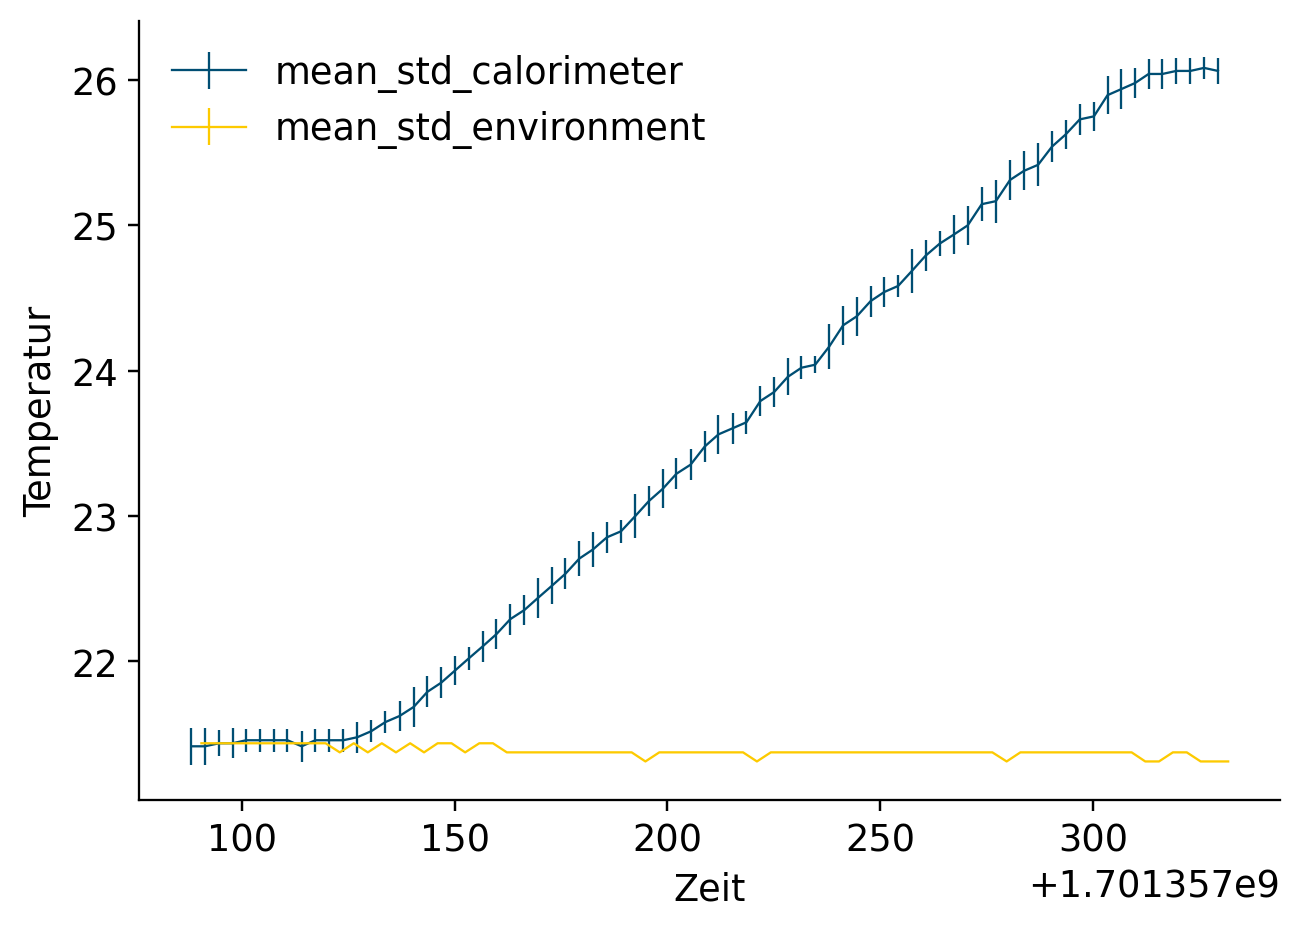

In [6]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting

utility.plot_temp_over_time(data_mean, time, ['mean_std_calorimeter','mean_std_environment'],'Zeit', 'Temperatur')

# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [7]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.
# Auslesen der sich im Gefäß befindenden Wassermasse.

data_path = 'datasheets'

water_mass = (m_json.get_json_entry(data_path,"1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753", ["calorimeter", "medium","mass", "value"]))
print(water_mass)
# DONE #

400


In [8]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.
# Ausgabe der angelegten Strom- und Spannungswerte, sowie der Messzeit.

path = 'data/Messung Kalorimeterkonstante/Messung Kalorimeterkonstante.h5'
s = h5.File(path,'r')
h = s["RawData/1ee21744-0355-6023-94b4-d5c041dd32cd"]   # UUID vom Erhitzer, auf welchen Spannung und Stromstärke gegeben werden

current = h["current"][()]
heat_time = h["heat_time"][()]
voltage = h["voltage"][()]

print(current)
print(heat_time)
print(voltage)
# DONE #

4.0
180.0
13.0


#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [9]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity
# Bestimmen der Anfangs- und Endtemperatur

temperature_end, temperature_start = utility.get_start_end_temperature(data_dict['temperature']) 
print(temperature_end, temperature_start)

# DONE #

25.675847457627118 21.519295302013422


#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [10]:
# TODO: Calculate heat capacity of the calorimeter
# Bestimmen der Kalorimeterkonstante der Vorrichtung.

calorimeter_const = (current*heat_time*voltage)/(temperature_end-temperature_start)

# DONE #

#### (Vii) Ergebnis

In [11]:
calorimeter_const

2251.8663665410063

### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [12]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
# Pfad zu den Messdaten der ersten Probe.

datafile_path_prob1 = ('data/Messung PCD001/Messung PCD001.h5')

# DONE #

In [13]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# Auslesen der Messtemperaturen.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1, 'RawData')

# DONE #

In [14]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# Gemessene Temperaturen den jeweiligen Geräten am Prüfstand zuordnen.

index_calorimeter = [0, 1, 2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [15]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

# Gemittelte Temperaturen und Standardabweichung der Temperaturen bestimmen. Zusätzlich noch die jeweiligen Zeiten der Messungen bestimmen.
# Temperaturen und Zeiten in Listen zusammengefasst, damit diese mit der vorgegebenen Funktion geplottet werden können.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath])

time_calorimeter = data_dict['time step'][index_calorimeter][0]
time_environment = data_dict['time step'][index_environment][0]
time_heater = data_dict['time step'][index_bath][0]

data_mean = [mean_std_calorimeter, mean_std_environment, mean_std_heater]
time = [time_calorimeter, time_environment, time_heater]

# DONE #

#### (iii) Daten ploten

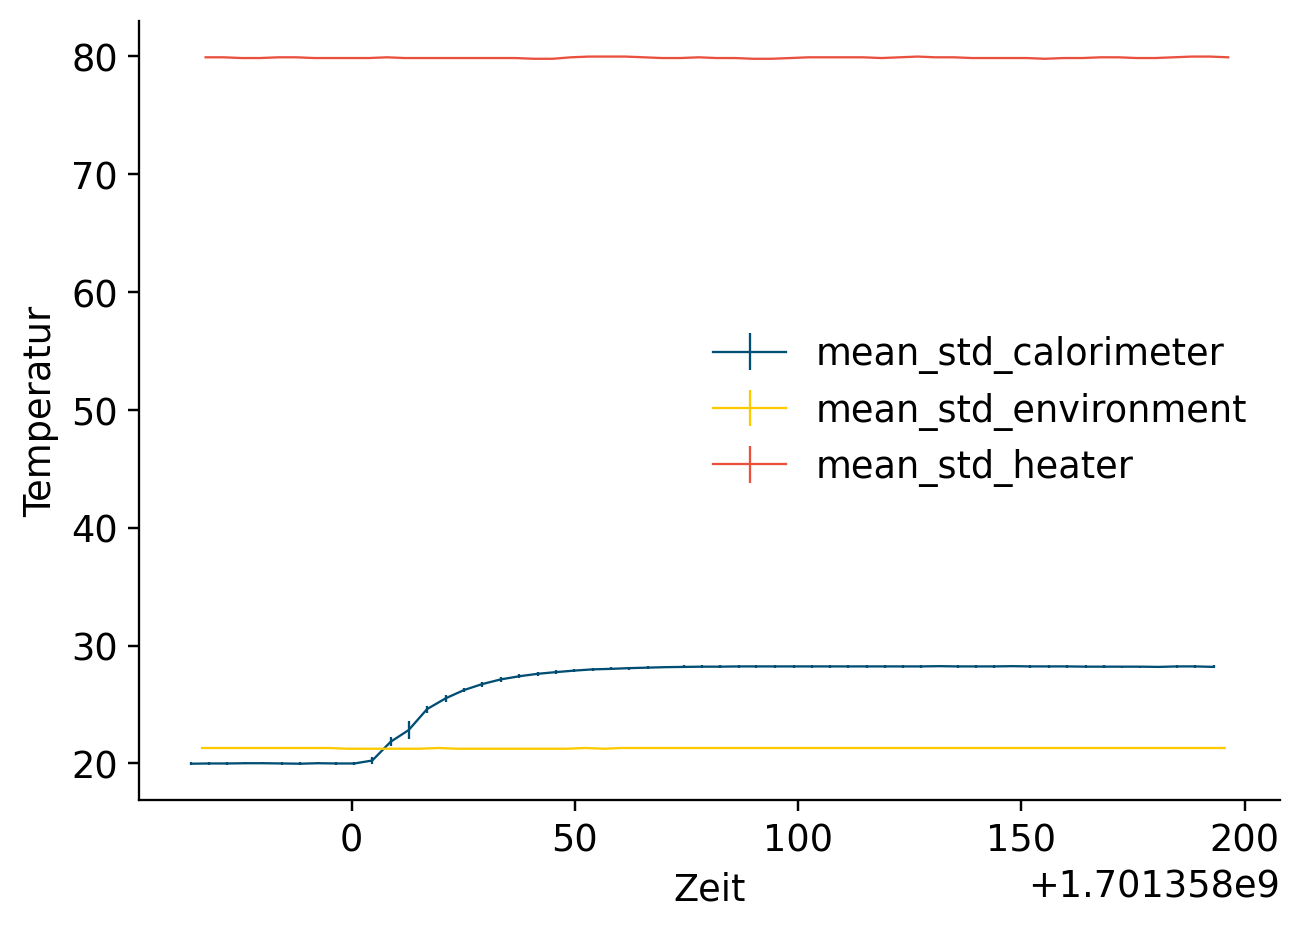

In [16]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.
# Die zu Listen zusammengefassten Zeiten und Temperaturen plotten und die Plots mit Legende versehen.

utility.plot_temp_over_time(data_mean, time, ['mean_std_calorimeter','mean_std_environment', 'mean_std_heater'],'Zeit', 'Temperatur')

# DONE #

#### (iv) Metadaten auslesen

In [17]:
# TODO: Read mass of the sample from the metadata of the experiment.
# Auslesen der Masse der ersten Versuchsprobe.

data_path = 'datasheets'

sample_mass = (m_json.get_json_entry(data_path,"1ee57b26-cc42-6a6e-b609-c4f6b4a81128", ["probe","mass", "value"]))
print(sample_mass)
 
# DONE #

631


#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [18]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity
# Bestimmen der Anfangs- und Mischtemperatur des Wassers.

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][0:2]) 
print(temperature_mix, temperature_start_water)

# DONE #

28.04140625 19.948863636363637


In [19]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.
# Gemittelte Endtemperatur des Wassers.

temperature_start_sample = np.mean(data_dict['temperature'][4][0:10])
print(temperature_start_sample)

# DONE #

79.8375


#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [20]:
# TODO: Calulate specific heat capacity of the sample.
# Bestimmung der Wärmekapazität.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [21]:
sample_heat_capa

0.5575723665998863

### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [22]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

# Ab hier für die zweite und dritte Messprobe alle oben kommentierten Schritte erneut ausführen.

datafile_path_prob2 = ('data/Messung PCD016/Messung PCD016.h5')

# DONE #

In [23]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2, 'RawData')

# DONE #

In [24]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0, 1, 2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [25]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath])

time_calorimeter = data_dict['time step'][index_calorimeter][0]
time_environment = data_dict['time step'][index_environment][0]
time_heater = data_dict['time step'][index_bath][0]

data_mean = [mean_std_calorimeter, mean_std_environment, mean_std_heater]
time = [time_calorimeter, time_environment, time_heater]

# DONE #

#### (iii) Daten ploten

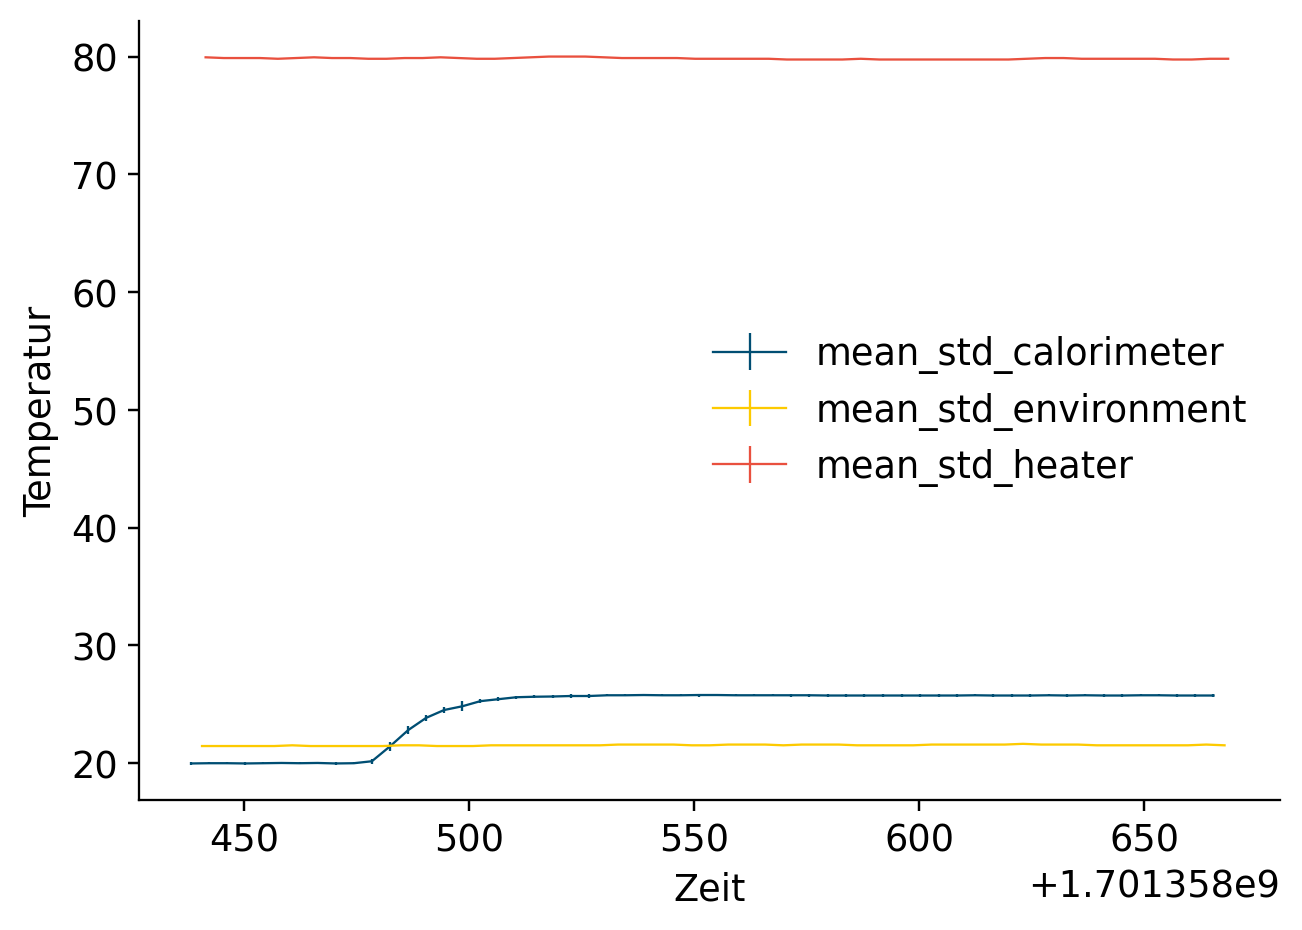

In [26]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time(data_mean, time, ['mean_std_calorimeter','mean_std_environment', 'mean_std_heater'],'Zeit', 'Temperatur')

# DONE #

#### (iv) Metadaten auslesen

In [27]:
# TODO: Read mass of the sample from the metadata of the experiment.

data_path = 'datasheets'

sample_mass = (m_json.get_json_entry(data_path,"1ee57b3c-b98a-64f2-aea5-ac942cc2bc1b", ["probe","mass", "value"]))
print(sample_mass)

# DONE #

226


#### (v) Anfangs- und Endwert der Temperatur

In [28]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][0:2]) 
print(temperature_mix, temperature_start_water) 

# DONE #

25.625753012048193 19.911931818181817


In [29]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = temperature_start_sample = np.mean(data_dict['temperature'][4][0:10])
print(temperature_start_sample)

# DONE #

79.875


#### (vi) spezifische Wärmekapazität bestimmen

In [30]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [31]:
sample_heat_capa

1.0494629394607526

### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [32]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = ('data/Messung PDC029/Messung PDC029.h5')

# DONE #

In [33]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3, 'RawData')

# DONE #

In [34]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0, 1, 2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [35]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath])

time_calorimeter = data_dict['time step'][index_calorimeter][0]
time_environment = data_dict['time step'][index_environment][0]
time_heater = data_dict['time step'][index_bath][0]

data_mean = [mean_std_calorimeter, mean_std_environment, mean_std_heater]
time = [time_calorimeter, time_environment, time_heater]

# DONE #

#### (iii) Daten ploten

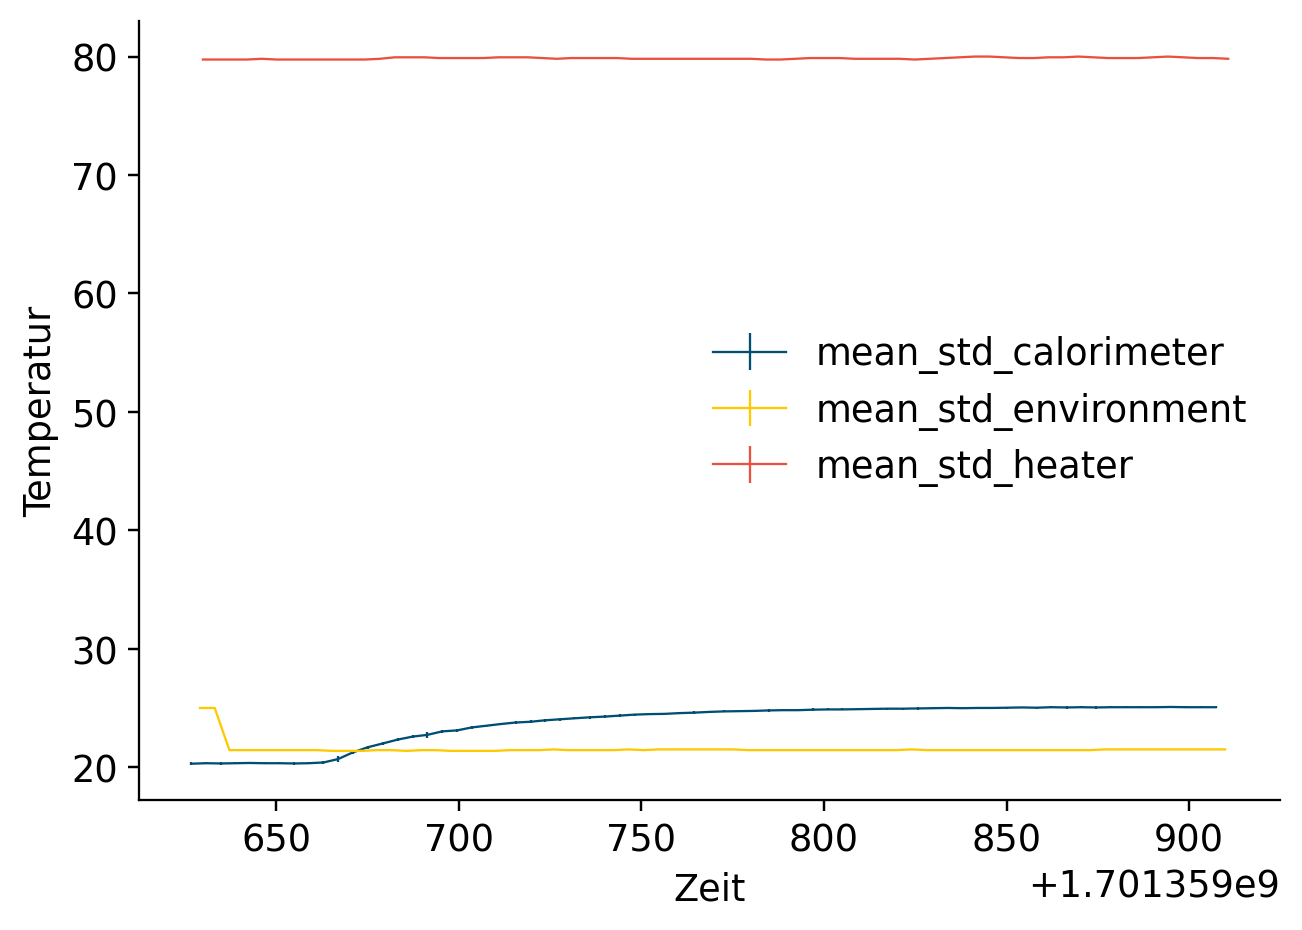

In [36]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time(data_mean, time, ['mean_std_calorimeter','mean_std_environment', 'mean_std_heater'],'Zeit', 'Temperatur')

# DONE #

#### (iv) Metadaten auslesen

In [37]:
# TODO: Read mass of the sample from the metadata of the experiment.

data_path = 'datasheets'

sample_mass = (m_json.get_json_entry(data_path,"1ee7d44b-f497-6207-b38a-46bf9417809f", ["probe","mass", "value"]))
print(sample_mass)

# DONE #

93


#### (v) Anfangs- und Endwert der Temperatur

In [38]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][0:2]) 
print(temperature_mix, temperature_start_water) 

# DONE #

24.725134408602152 20.369791666666668


In [39]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = temperature_start_sample = np.mean(data_dict['temperature'][4][0:10])
print(temperature_start_sample)

# DONE #

79.75625


#### (vi) spezifische Wärmekapazität bestimmen

In [40]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [41]:
sample_heat_capa

1.9163449486076187

## Diskussion
Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage. Wie wirkt sich die mit der Probe aus dem Heißwasserbad transportierte Wassermenge auf das Ergebnis aus? Welche weiteren Fehlerquellen gibt es?

Grundsätzlich lässt sich sagen, dass dieser Versuchsaufbau für alle drei Proben sehr realitätsnahe Ergebnisse geliefert hat. 

Edelstahl: Versuch: C_Versuch = 0,558 kJ/kgK,
           Realität: C_real = 0,502 kJ/kgK
           
Aluminium: Versuch: C_Versuch = 1,05 kJ/kgK,
           Realität: C_real = 0,888 kJ/kgK
           
Kunststoff (PA 6.6): Versuch: C_Versuch = 1,92 kJ/kgK,
            Realität: C_real = 1,7 kJ/kgK 

Wie man erkennen kann, weichen die Werte nur geringfügig von der Literaturwerten ab. Dies zeigt auf, dass der Versuchsaufbau gut geeignet ist, um Wärmekapazitäten zu bestimmen. Das gelingt, obwohl der Versuchsaufbau vergleichsweise noch relativ einfach ist und es einige äußere Einflussfaktoren auf die Ergebnisse gibt.
Die vorliegenden Abweichungen könnte zum Beispiel aus verschieden heißen Proben resultieren. Wir haben lediglich die 80 Grad Celsius des Wasserbades beobachten können. Für eine eindeutige Bestimmung hätte man noch die Temperatur der Probe bestimmen müssen, damit diese alle mit der gleichen Temperatur ins Wasserbad gelegt werden. 

Des Weiteren hat die mitgenommene Wassermenge, welche mit der Probe ins andere Bad transportiert wurde, einen Einfluss auf die Wärmekapazität, da sich natürlich die Wassertemperatur geringfügig erhöht und die Masse zunimmt. Da wir allerdings stark darauf geachtet haben, nur ganz geringe Mengen in das andere Behältnis mitzuführen, dürfte der Einfluss dadurch nur sehr gering sein. 

Außerdem haben wir die Probe beim Transport in das andere Behältnisse eine gewisse Zeit an der Umgebungsluft gehabt, was für eine weitere Abkühlung gesorgt hat. 

Genauigkeit der Messungen: Edelstahl: 0,502/0,558 = 0,9 ; 
                           Aluminium: 0,888/1,05 = 0,846 ; 
                           Kunststoff: 1,7/1,92 = 0,885
                        
Die Wärmekapazität von Edelstahl konnte in unserer Messung am Besten bestimmt werden. Eventuell könnte dies daran liegen, dass Edelstahl der beste Wärmeleiter ist und seine Wärme deshalb sehr schnell an die umliegenden Medien abgibt. In der Verweilzeit im Behältnis können sich die Temperaturen so am besten angleichen.

## Fazit
Insgesamt hat mir der Laborversuch viel Spaß gemacht. Das lag vorallem daran, dass die Messwerte und die Ergebnisse realistisch sind. Somit hat man ein Gefühl für die Versuchsdurchführung bekommen und kann somit besser einschätzen wie man bei weiteren Laborversuchen vorgeht. Des Weiteren hat der Versuch gezeigt, dass man trotz einiger Störgrößen und äußeren Einflüssen ein gutes Messergebnis erzielen kann. Im nächsten Versuch weiss ich zudem besser worauf man achten muss, um die Ergebnisse möglichst nicht zu beeinflussen.